In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [19]:
epochs = 50
lr = 1e-3
batch_size = 128
img_dims = (96,96,3)

data = []
labels = []

In [24]:
image_files = [f for f in glob.glob(r'C:\Users\srira\Documents\DT FINAL\Gender-Detection-master\gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)
image_files

['C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\132914.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\man\\104642.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\man\\103075.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\183592.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\137234.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\132830.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\man\\173919.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\184396.jpg.jpg',
 'C:\\Users\\srira\\Documents\\DT FINAL\\Gender-Detection-master\\gender_dataset_face\\woman\\132242.jpg.jpg',
 'C:\\U

In [25]:
#Labelling

for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Users\srira\Downloads\Gender-Detection-master\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

In [5]:
data = np.array(data, dtype="float") / 255.0  #feature scaling
labels  = np.array(labels)

In [6]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

#print(trainY)

In [7]:
def build(width, height, depth, classes): #previoussly defined
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim ))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

In [20]:
import tensorflow
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)

# compile the model
opt = RMSprop(learning_rate=lr, decay=lr/epochs)

#tensorboard=tensorflow.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY), steps_per_epoch=len(trainX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/50
50/50 [==============================] - 15s 273ms/step - loss: 0.8487 - accuracy: 0.7047 - val_loss: 1.1703 - val_accuracy: 0.5050
Epoch 2/50
50/50 [==============================] - 13s 256ms/step - loss: 0.4576 - accuracy: 0.8175 - val_loss: 1.0616 - val_accuracy: 0.5056
Epoch 3/50
50/50 [==============================] - 13s 256ms/step - loss: 0.3480 - accuracy: 0.8719 - val_loss: 2.4596 - val_accuracy: 0.5050
Epoch 4/50
50/50 [==============================] - 12s 236ms/step - loss: 0.2754 - accuracy: 0.8994 - val_loss: 0.7261 - val_accuracy: 0.6169
Epoch 5/50
50/50 [==============================] - 12s 232ms/step - loss: 0.2394 - accuracy: 0.9145 - val_loss: 0.9454 - val_accuracy: 0.7519
Epoch 6/50
50/50 [==============================] - 12s 232ms/step - loss: 0.2361 - accuracy: 0.9142 - val_loss: 2.6028 - val_accuracy: 0.5175
Epoch 7/50
50/50 [==============================] - 12s 231ms/step - loss: 0.1939 - accuracy: 0.9297 - val_loss: 1.6706 - val_accuracy: 0.6081

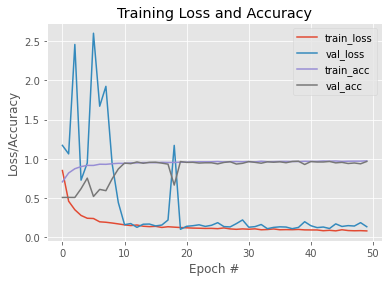

In [21]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.savefig('plot_RMS_Binary.png')
plt.show()

In [22]:
#from sklearn.metrics import classification_report

#matrix=classification_report(testY, )

In [23]:
model.save('gender_detection_RMS_Binary.model')

INFO:tensorflow:Assets written to: gender_detection_RMS_Binary.model\assets
